In [15]:
from drowsiness_detection.run_grid_search_experiment import base
from pprint import pprint
from sklearnex import patch_sklearn

patch_sklearn()
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv  # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.pipeline import Pipeline
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from drowsiness_detection.helpers import spec_to_config_space
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
from sacred import Experiment
from sacred.observers import FileStorageObserver
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from drowsiness_detection import config
from sklearn.model_selection import StratifiedKFold

from drowsiness_detection.data import session_type_mapping, get_feature_data, \
    preprocess_feature_data

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [13]:
config.set_paths(30,10)

base_config = base()
pprint(base_config)

{'exclude_by': 'a',
 'grid_search_params': {'error_score': 0,
                        'factor': None,
                        'max_resources': None,
                        'n_jobs': -1,
                        'resource': None,
                        'scoring': None,
                        'verbose': 1},
 'hyperparameter_specs': None,
 'model_name': None,
 'n_splits': 10,
 'recording_frequency': None,
 'seed': 123,
 'test_size': 0.2,
 'window_in_sec': None}


In [14]:
data = get_feature_data(data_path=config.PATHS.WINDOW_FEATURES)
X, y = preprocess_feature_data(feature_data=data,
                                   exclude_sess_type=session_type_mapping[base_config["exclude_by"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=base_config["test_size"],
                                                        random_state=base_config["seed"])

0 is drowsy, 1 is not drowsy


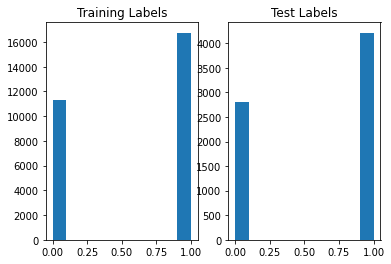

In [30]:
# cv = StratifiedKFold(n_splits=base_config["n_splits"])
print("0 is drowsy, 1 is not drowsy")
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(y_train)
ax1.set_title("Training Labels")
ax2.hist(y_test)
ax2.set_title("Test Labels")
plt.show()